In [1]:
import sys
import os.path
print(sys.version)
print(sys.executable)

#!jupyter kernelspec list
#upgrade pip3 for any installation that might be needed.
#!{sys.executable} -m pip install --upgrade pip

3.6.3 (v3.6.3:2c5fed86e0, Oct  3 2017, 00:32:08) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
/Users/tonmoy/Development/Workspace/python01/Githubbr/venv/bin/python3


In [2]:
#check the output of the following statement to see the versions of the dependencies.
#To hide the output after viewing, from the menu on top of the page:
#     Cell > Current Outputs > Toggle
!pip freeze

appnope==0.1.0
attrs==19.1.0
backcall==0.1.0
bleach==3.1.0
Click==7.0
cycler==0.10.0
decorator==4.4.0
defusedxml==0.6.0
entrypoints==0.3
Flask==1.1.1
ipykernel==5.1.2
ipython==7.7.0
ipython-genutils==0.2.0
ipywidgets==7.5.1
itsdangerous==1.1.0
jedi==0.14.1
Jinja2==2.10.1
joblib==0.13.2
jsonschema==3.0.2
jupyter==1.0.0
jupyter-client==5.3.1
jupyter-console==6.0.0
jupyter-core==4.5.0
kiwisolver==1.1.0
MarkupSafe==1.1.1
matplotlib==3.1.1
mistune==0.8.4
nbconvert==5.5.0
nbformat==4.4.0
notebook==6.0.0
numpy==1.17.0
pandas==0.25.0
pandocfilters==1.4.2
parso==0.5.1
pexpect==4.7.0
pickleshare==0.7.5
prometheus-client==0.7.1
prompt-toolkit==2.0.9
ptyprocess==0.6.0
Pygments==2.4.2
pyparsing==2.4.2
pyrsistent==0.15.4
python-dateutil==2.8.0
pytz==2019.1
pyzmq==18.0.2
qtconsole==4.5.2
scikit-learn==0.21.3
scipy==1.3.1
seaborn==0.9.0
Send2Trash==1.5.0
six==1.12.0
sklearn==0.0
terminado==0.8.2
testpath==0.4.2
tornado==6.0.3
traitlets==4.3.2
wcwidth==0.1.7
webencodings==0.5.1
Werkzeug==0.15.5
widgets

In [3]:
!pip show pandas numpy sklearn seaborn

Name: pandas
Version: 0.25.0
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: http://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /Users/tonmoy/Development/Workspace/python01/Githubbr/venv/lib/python3.6/site-packages
Requires: numpy, pytz, python-dateutil
Required-by: seaborn
---
Name: numpy
Version: 1.17.0
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /Users/tonmoy/Development/Workspace/python01/Githubbr/venv/lib/python3.6/site-packages
Requires: 
Required-by: seaborn, scipy, scikit-learn, pandas, matplotlib
---
Name: sklearn
Version: 0.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://pypi.python.org/pypi/scikit-learn/
Author: UNKNOWN
Author-email: UNKNOWN
License: None
Location: /Users/tonmoy/Development/Workspace/python01/Githubbr/venv/

This notebook, whch is the first of a series, will examine the California Housing Dataset that is popular in the Data Science field. The dataset originates from a 1997 paper entitled 'Sparse Spatial Autoregressions' by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. It was modified by introducing a categorical field names Ocean Proximity, and some vaules were replaced with nulls in order to create a dataset that would require cleaning. This dataset was housed in Luis Torgo's webpage[2] and StatLib repository, though they are no longer online there. The dataset is currently housed in Aurelien Geron's Github repository[1]  

This notebook will proceed with ML project steps (exploratory data analysis, data cleaning etc) and build up to several different Regression algorithms under sklearn and their performance analysis using Learning Curves and other means. 


[source]: 
[1] https://github.com/ageron/handson-ml/blob/master/datasets/housing/
[2] http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

<p><p>Step 0. Acquire the Dataset, and prepare it for processing.

In [4]:
#check is dataset is already extracted as a csv file, if not perform the extraction
import time, tarfile 
dataset_folder_name = 'datasets'
file_name = 'housing'
file_name_csv = os.path.join(dataset_folder_name, file_name+".csv")
file_name_tgz = os.path.join(dataset_folder_name, file_name+".tgz")
print(file_name_csv)
if not os.path.isfile(file_name_csv):
    print("File does not exist, extracting")
    if os.path.isfile(file_name_tgz) and tarfile.is_tarfile(file_name_tgz):
        time1 = time.time()
        print("Extracting from tgz file starting at ", time.ctime(time1))
        tarf = tarfile.open(file_name_tgz)
        tarf.extractall(path=dataset_folder_name)
        time2 = time.time()
        print("Extracting from tgz file ended at ", time.ctime(time2))
        del(time1,time2)
        if os.path.isfile(file_name_csv):
            print("file successfully extracted.")
        else:
            print("file extraction failed.")
        
        

datasets/housing.csv


In [5]:
import numpy as np
import pandas as pd

def csv_to_pd(filepath):
    """Returns the csv file as pandas dataframe."""
    if os.path.isfile(filepath) and filepath.lower().endswith(".csv"):
        return pd.read_csv(filepath)
    else:
        print("File not found, or file in incorrect format.")
        return None
file_name_csv = 'datasets/housing.csv'
df = csv_to_pd(file_name_csv)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Step 1. Exploratory Data Analysis

In [6]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

#Investigate the dataset as a whole
#Investigate dataset size
def print_dataframe_size(df, verbose=False):
    """Returns the size of the dataframe in string."""
    import math
    if df is None:
        return '0B'#return zero is null input provided
    raw_size = df.memory_usage(deep=True).sum()# raw_size has the memory taken up by the dataframe
    if verbose == True:
        print("raw_size == ", raw_size)
    byte_scale = ["B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB"]#list holding exponents for bytes
    i = int(math.floor(math.log(raw_size, 1024)))
    p = math.pow(1024, i)
    s = round(raw_size / p, 2)
    return_string = "{} {}"
    return return_string.format(s, byte_scale[i])
    
print("The dataset takes up : ",print_dataframe_size(df))#, verbose=True)


The dataset takes up :  2.7 MB


In [7]:
#Examine the columns in the dataframe
print("The Dataframe has {} rows and {} columns".format(df.shape[0], df.shape[1]))
df_column_names = df.columns.values
print("Column names are :\n", df_column_names,"\n")
#get the max string length of all column names, 
#this wil be used for formatting strings later on 
max_col_len = max(list(map(lambda x: len(x) , df_column_names)))
for col_name in df_column_names:
    print('Column: {message:<{width}} is of type {ddt}'.format(message=col_name, width=max_col_len, ddt=df[col_name].dtype))

The Dataframe has 20640 rows and 10 columns
Column names are :
 ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value' 'ocean_proximity'] 

Column: longitude          is of type float64
Column: latitude           is of type float64
Column: housing_median_age is of type float64
Column: total_rooms        is of type float64
Column: total_bedrooms     is of type float64
Column: population         is of type float64
Column: households         is of type float64
Column: median_income      is of type float64
Column: median_house_value is of type float64
Column: ocean_proximity    is of type object


In [8]:
#Examine the Correlations among the columns of the dataset
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.92,-0.11,0.045,0.07,0.1,0.055,-0.015,-0.046
latitude,-0.92,1,0.011,-0.036,-0.067,-0.11,-0.071,-0.08,-0.14
housing_median_age,-0.11,0.011,1,-0.36,-0.32,-0.3,-0.3,-0.12,0.11
total_rooms,0.045,-0.036,-0.36,1,0.93,0.86,0.92,0.2,0.13
total_bedrooms,0.07,-0.067,-0.32,0.93,1,0.88,0.98,-0.0077,0.05
population,0.1,-0.11,-0.3,0.86,0.88,1,0.91,0.0048,-0.025
households,0.055,-0.071,-0.3,0.92,0.98,0.91,1,0.013,0.066
median_income,-0.015,-0.08,-0.12,0.2,-0.0077,0.0048,0.013,1,0.69
median_house_value,-0.046,-0.14,0.11,0.13,0.05,-0.025,0.066,0.69,1


plot file already exists, showing that...


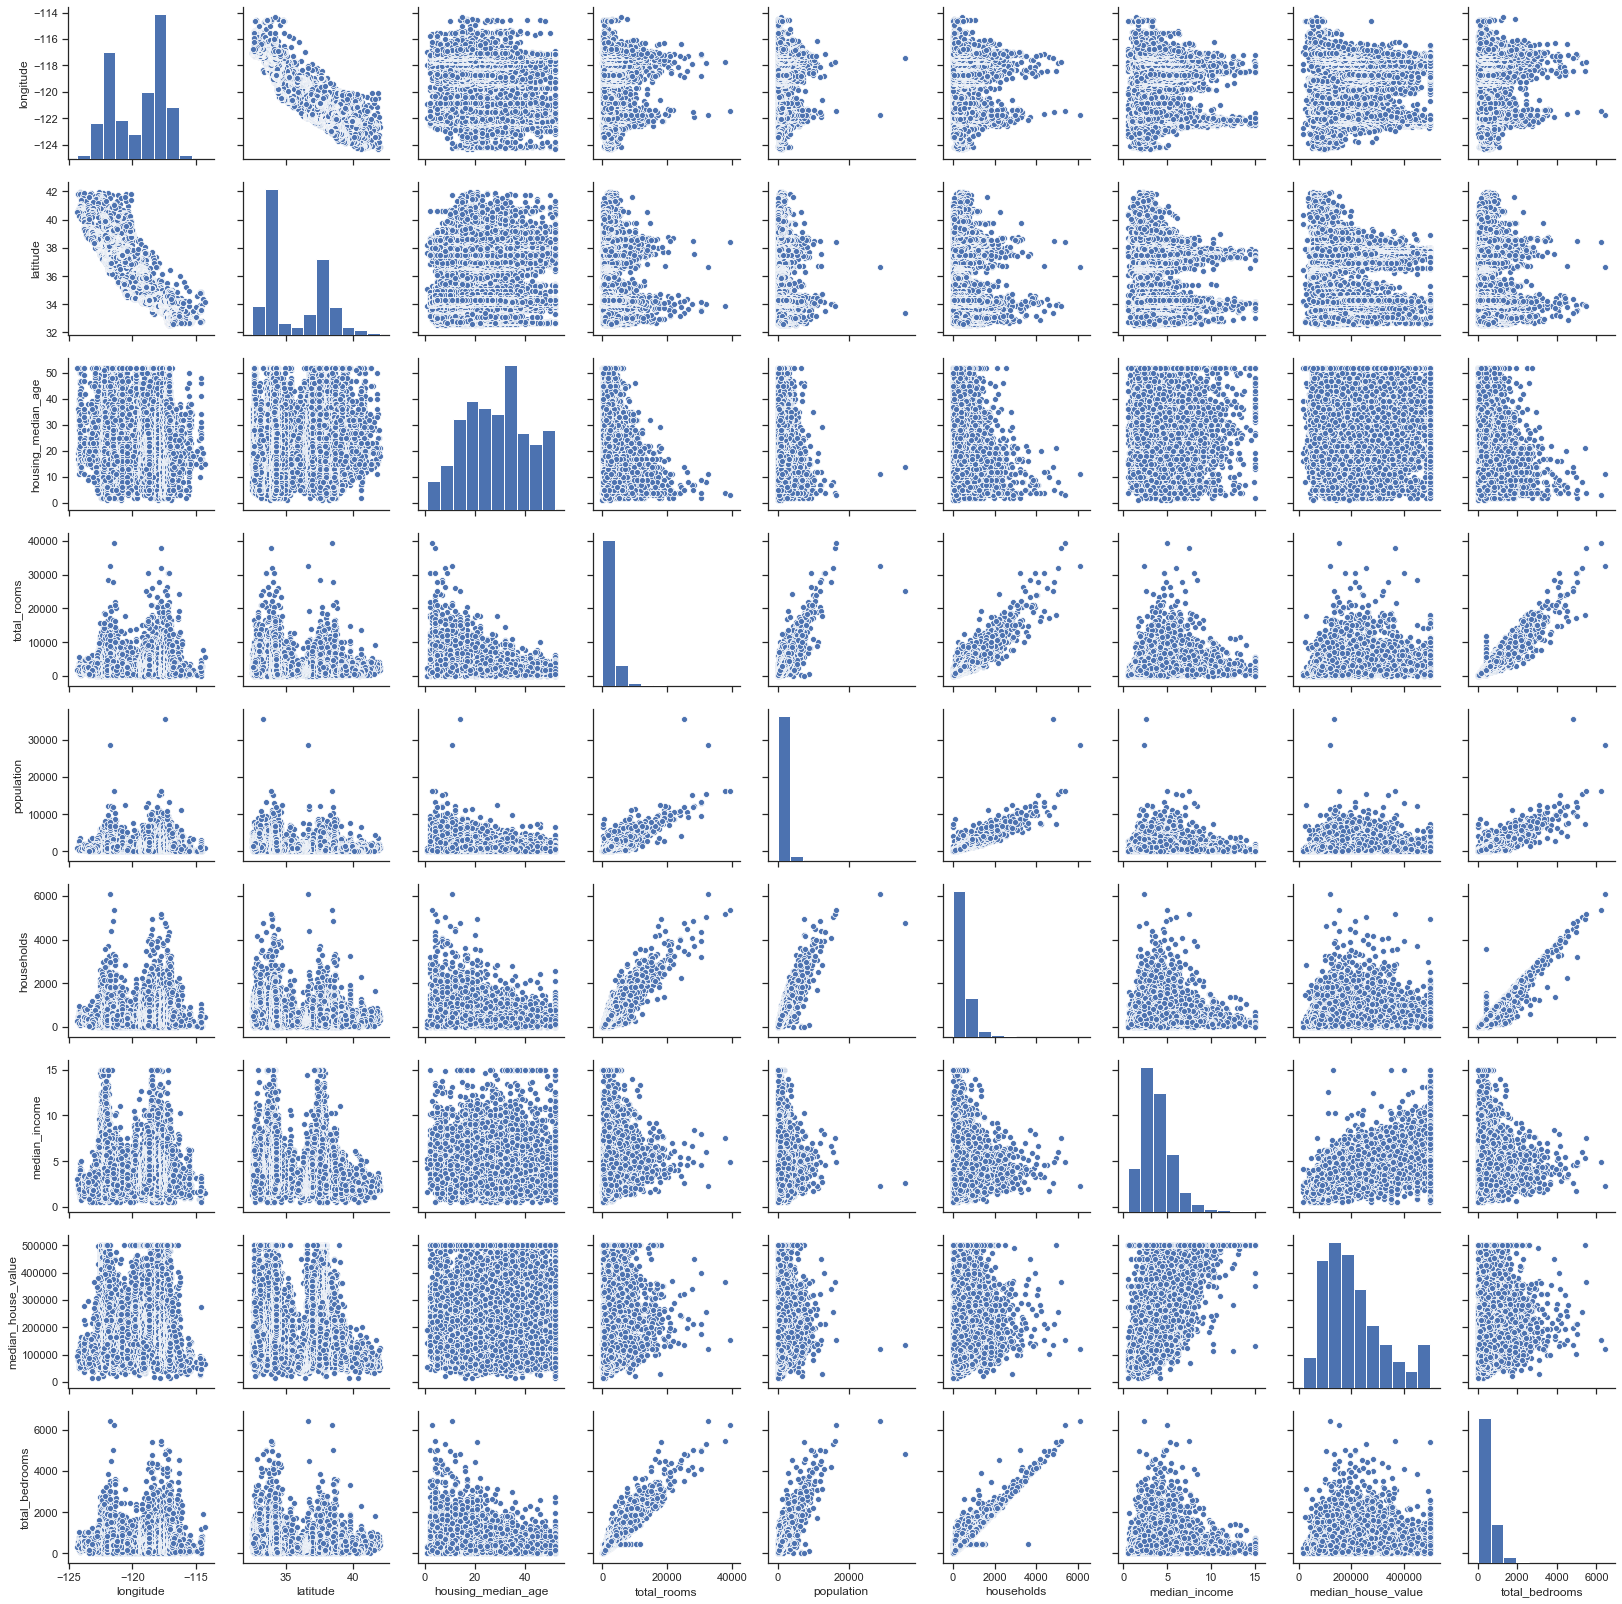

In [9]:
import os
import seaborn as sns
from IPython.display import Image, display

sns.set(style="ticks", color_codes=True)

sns_plot_file = 'sns_plot_whole_df.png'
if not os.path.isfile(sns_plot_file):
    #plot file does not exist so make the plot
    g = sns.pairplot(df)
    g.savefig(sns_plot_file)
else:
    #plot file exists, so dont spend processor time replotting it
    print("plot file already exists, showing that...")
    display(Image(filename=sns_plot_file))

In the above two charts, we can see relatively stronger correlations between the columns: total_rooms, total_bedrooms, population, households; and the columns: median_income, median_house_value

The cells below examine the Ocean Proximity column which is categorical

In [10]:
#All columns except column ocean_proximity is of float64 type, 
#let's examine column ocean_proximity some more.
col_ocn_prx = df_column_names[-1]
ocn_prx_values = list(np.unique(list(df[col_ocn_prx].values)))#list holding all unique ocean_proximity values
print("All (unique) possible values of column \"ocean_proximity\" are:\n\t\t",ocn_prx_values,"\n")
#note: a look at the values:['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'] clarifies the purpose 
#of the column. 
print(df["ocean_proximity"].value_counts())#Checking on the counts of each type

ocn_prx_val_list, num_rows_list, avg_med_h_val_list, avg_med_h_income_list = [], [], [], []
for col_val in ocn_prx_values:
    df_v = df.loc[df["ocean_proximity"]==col_val]
    ocn_prx_val_list.append(col_val)#ocean_proximity value
    num_rows_list.append(df_v.shape[0])
    avg_med_h_val_list.append(df_v["median_house_value"].mean())
    avg_med_h_income_list.append(df_v["median_income"].mean())
    del(df_v)#release memory
    
d = {"ocn_prx_value":ocn_prx_val_list,\
    "num_rows":num_rows_list,\
    "avg_med_h_value":avg_med_h_val_list,\
    "avg_med_h_income":avg_med_h_income_list}
df_ocn_prx_summary = pd.DataFrame(data=d)
#print(df_ocn_prx_summary.columns.values)

df_ocn_prx_summary.sort_values(by=['avg_med_h_value'], axis=0, ascending=False,  inplace=True, kind='quicksort',\
                   na_position='last')

df_ocn_prx_summary.head(10)



All (unique) possible values of column "ocean_proximity" are:
		 ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'] 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


,ocn_prx_value,num_rows,avg_med_h_value,avg_med_h_income
2,ISLAND,5,380440.000000,2.744420
3,NEAR BAY,2290,259212.311790,4.172885
4,NEAR OCEAN,2658,249433.977427,4.005785
0,<1H OCEAN,9136,240084.285464,4.230682
1,INLAND,6551,124805.392001,3.208996


The columns longitude and latitude are combines together to get the coordinates of a location on the globe. The cell below examines them together.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


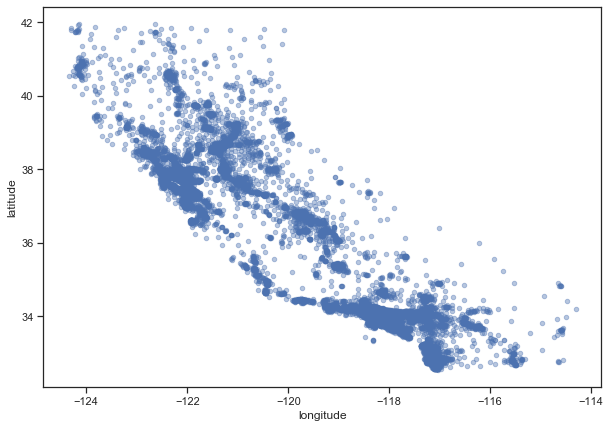

In [11]:
#Plot longitude, latitude 
#function source/documentation at:
#https://github.com/pandas-dev/pandas/blob/v0.25.0/pandas/plotting/_core.py#L504-L1533

%matplotlib inline
########
#from the pandas source (url above)
#_common_kinds = ("line", "bar", "barh", "kde", "density", "area", "hist", "box")
#_series_kinds = ("pie",)
#_dataframe_kinds = ("scatter", "hexbin")
#########
plot_types= ["line", "bar", "barh", "kde", "density", "area", "hist", "box", "pie", "scatter", "hexbin"]
df.plot.scatter( x='longitude', y='latitude', alpha=0.4,  figsize=(10,7))

The map of California is outlined above by the coordinates of the dataset, as would be expected.

Step 2. Data Cleaning

In [12]:
#Lets examine the dataframe in terms of missing values

cols_with_null = df.columns[df.isna().any()].tolist()
print("Columns with null values :",cols_with_null)
for c in cols_with_null:
    num_rows_null = df[c].isna().sum()
    print("For column :",c,", the total rows with nulls :", num_rows_null)
    s = df[c].isna()
    index_null = np.where(s==True)
    #since index_null is a tuple with one element, we refer to its first element
    #with is an array with the index numbers of rows with null values
    if len(index_null) == 1:
        index_null = index_null[0]
    #uncomment the following line to view null valued rows
    #print(df.loc[index_null, ['longitude','latitude','total_bedrooms']])


Columns with null values : ['total_bedrooms']
For column : total_bedrooms , the total rows with nulls : 207


In [14]:
total_bedrooms_median = df['total_bedrooms'].median()
print("Median Value of total_bedrooms column is :", total_bedrooms_median)
df1 = df['total_bedrooms'].fillna(total_bedrooms_median)
print(df.loc[:6, 'total_bedrooms'])
print("Number of null values in df1 is :", df1.isna().sum())
df.drop(labels='total_bedrooms', axis=1, inplace=True)
df['total_bedrooms'] = df1
df.head()

Median Value of total_bedrooms column is : 435.0
0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
5     213.0
6     489.0
Name: total_bedrooms, dtype: float64
Number of null values in df1 is : 0


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY,129.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1106.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY,190.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY,235.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY,280.0


Categorical columns can be handled in either two manners:

1> (Label Encoding) Each possible value can be given a numerical value. For example, 1 for Island, 2 for Inland...
This method has one issue however, the ML algorithm may infer that the higher or lower the value in the column has a numerical impact on the prediction - which is not necessarily sensible ofcourse. 

2> (One-hot encoding) Therefore, an alternative means of handling the categorical columns is to give a column for each possible value of the categorical column and give it a value of 1 if that value is the value for that row, or 0 otherwise. This method is also called using 'dummy variable' in Statistics and Regression literature. This method does lead to numerous new columns being created however. 

In [15]:
#one hot encode ocean_proximity
df_hot_encoded = pd.get_dummies(df, prefix=['ocean_proximity'])
df_hot_encoded.columns.values
#save as csv file
df_hot_encoded.to_csv('cleaned_hot_encoded_housing.csv', index=False)

In [16]:
#Read from saved csv
df__ = pd.read_csv('cleaned_hot_encoded_housing.csv')
df__.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,total_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,129.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,1106.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,190.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,235.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,280.0,0,0,0,1,0


In [17]:
y_labels = df__['median_house_value']
df__.drop(labels=['median_house_value'], axis=1, inplace=True)

In [18]:
from sklearn.model_selection import train_test_split
#random seed set to 42 for reproduciability
x_train, x_test, y_train, y_test = train_test_split(df__, y_labels, test_size=0.3, random_state=42)
#
del(df__)

Step 3. Train and fit Regression models.

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
def print_regression_model(intercept=0, coefs=None, parent_df_column_names=None):
    '''Returns a Pandas DataFrame with Intercept and Coefficients of Regression'''
    coef_list = list(coefs)
    col_list = ['intercept']
    val_list = [intercept]
    for c in coef_list:
        col_list.append(parent_df_column_names[coef_list.index(c)])
        val_list.append(c)
        d = {'cols':col_list,\
             'coef_val':val_list}
    df = pd.DataFrame(columns=col_list)
    df.loc[0] = val_list
    return df
    

print("Model Score is : {:.4}%".format(model.score(x_train, y_train)*100))
print_regression_model(model.intercept_, model.coef_, x_train.columns.values)

Model Score is : 56.65%


,intercept,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,total_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.360667e+06,-17629.465302,-21683.850478,2988.104096,13.468282,-44.825568,11.473025,33382.856158,82.935321,-18616.025721,-25642.369377,1.136868e-12,14297.035811,29961.359288


In [90]:
from sklearn.metrics import mean_squared_error, r2_score, roc_curve
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error of the Regression is : {:,.4f}".format(mse))
print("Mean Error of the Regression is : {:,.4f}".format(np.sqrt(mse)))
print("R^2 Score of the Regression is : {:.4f}".format(r2))

Mean Squared Error of the Regression is : 5,808,025,679.5483
Mean Error of the Regression is : 76,210.4040
R^2 Score of the Regression is : 0.5575


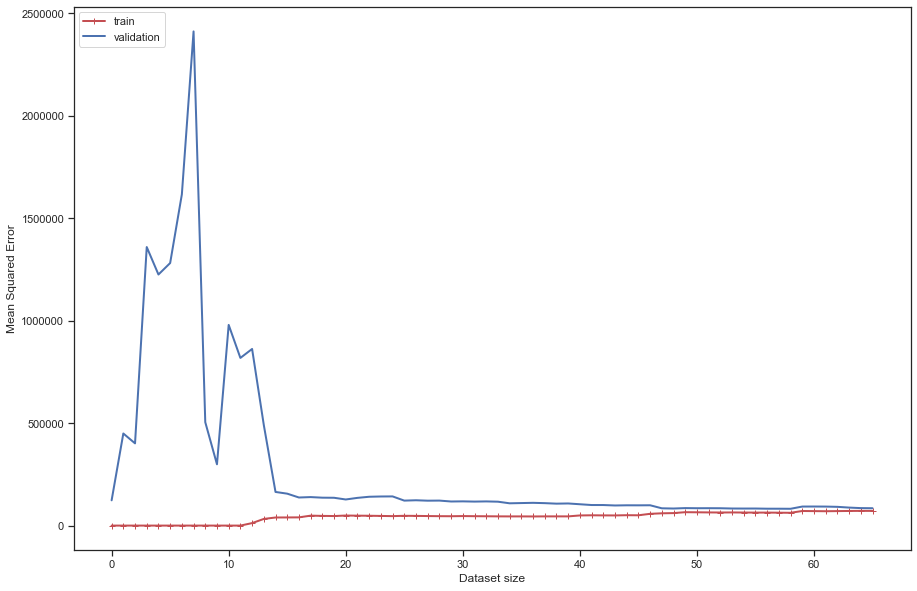

In [91]:
#Learning Curves 
def learning_curves(model, X, y, div=250, return_plt=True):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
    train_errors, test_errors = [], [] #holds the rmse for training and test sets respectively
    #since the whole plot takes a long time, we will give the option of displaying for a part of the data alone
    #div parameter allows us to use a portion of the dataset. when div==1 the whole dataset is used.
    if div < 1 : #avoid division by 0 or overflow above dataset range
        div = 250
    div = int(div)
    for m in range(1, int(len(X_train)/div)): #iterate over each element of the training set
        model.fit(X_train[:m], y_train[:m]) #fit only a portion of the dataset to the model
        y_train_predict = model.predict(X_train[:m]) #predict for a corresponding proortion of the val set
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.figure(figsize=(15,10))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
    plt.plot(np.sqrt(test_errors), "b-", linewidth=2, label='validation')
    plt.legend(loc='upper left')
    plt.xlabel('Dataset size')
    plt.ylabel('Mean Squared Error')
    
%matplotlib inline
learning_curves(model, x_train, y_train, div=150)
plt.show()  

In [92]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(max_iter=250, penalty='l2', eta0=0.0001, loss='squared_loss')
sgd_model.fit(x_train, y_train)

print("SGD Model Score is : {:.4}%".format(sgd_model.score(x_train, y_train)*100))
print_regression_model(sgd_model.intercept_, sgd_model.coef_, x_train.columns.values)

SGD Model Score is : -4.949e+18%


,intercept,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,total_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,[-12833774.315674238],4.280122e+09,-6.317772e+09,-1.101767e+10,5.973019e+09,-1.836823e+09,1.381206e+10,8.408628e+07,1.184554e+09,2.433760e+09,-5.656687e+08,2.979842e+07,-2.514164e+09,6.034308e+08


In [93]:
from sklearn.metrics import mean_squared_error, r2_score, roc_curve
y_pred = sgd_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error of the SGDRegression is : {:,.4f}".format(mse))
print("Mean Error of the SGDRegression is : {:,.4f}".format(np.sqrt(mse)))
print("R^2 Score of the SGDRegression is : {:.4f}".format(r2))

Mean Squared Error of the SGDRegression is : 665,417,050,091,501,711,777,595,392.0000
Mean Error of the SGDRegression is : 25,795,678,903,481.1367
R^2 Score of the SGDRegression is : -50696892699134744.0000


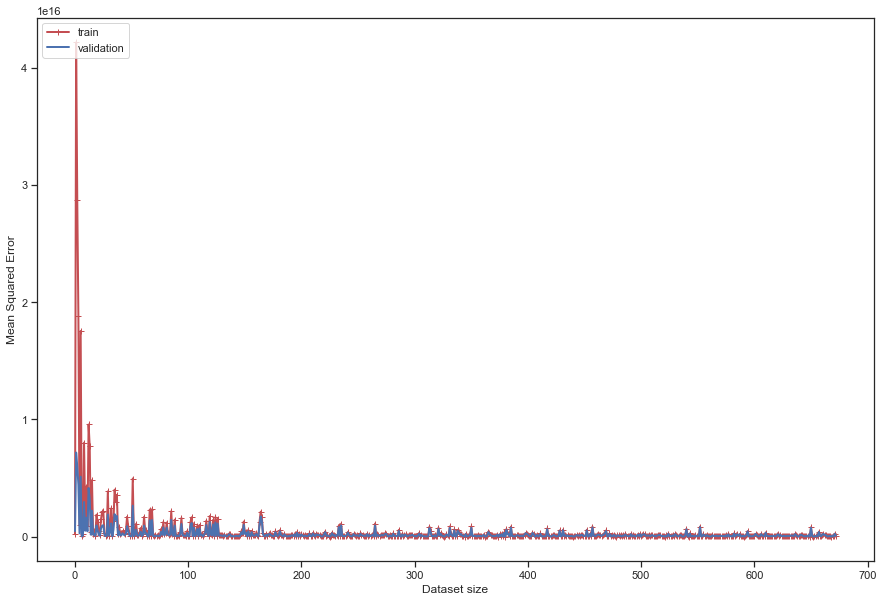

In [94]:
%matplotlib inline
learning_curves(sgd_model, x_train, y_train, div=15)
plt.show()

The atypical results of using the SGDRegressor (relative to the other two models used in thois notebook) can most likely result from its high sensitivity to feature scaling, and its stochastic nature.  


https://scikit-learn.org/stable/modules/sgd.html

In [95]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

print("Ridge Model Score is : {:.4}%".format(ridge_model.score(x_train, y_train)*100))
print_regression_model(ridge_model.intercept_, ridge_model.coef_, x_train.columns.values)

Ridge Model Score is : 64.7%


,intercept,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,total_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-2.242391e+06,-26526.678087,-24944.769954,1106.41552,-5.871344,-37.330087,42.15489,39267.208659,105.865116,-13490.54969,-54519.950204,97873.545712,-19540.113218,-10322.932597


Mean Squared Error of the RidgeRegression is : 4,734,453,327.4703
Mean Error of the RidgeRegression is : 68,807.3639
R^2 Score of the RidgeRegression is : 0.6393


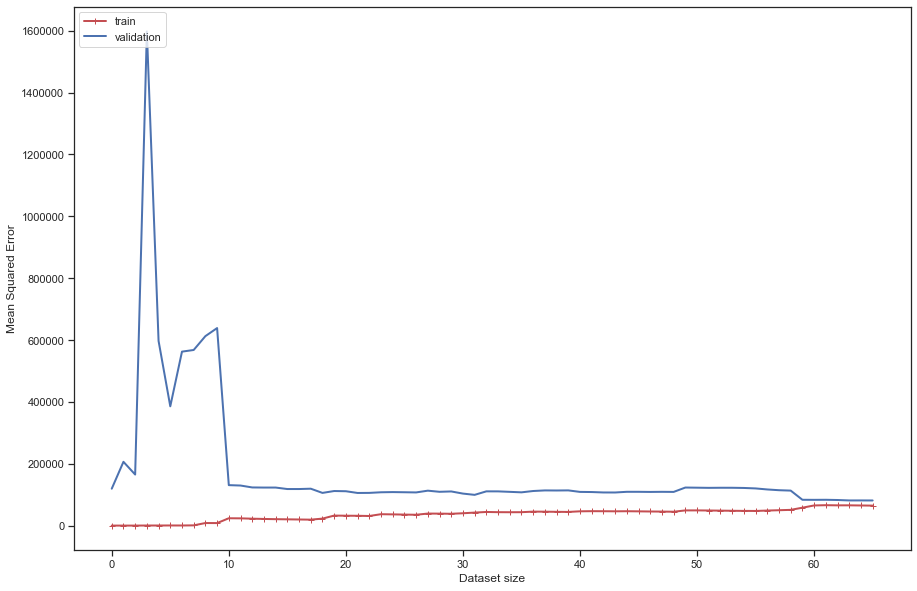

In [96]:
from sklearn.metrics import mean_squared_error, r2_score, roc_curve
y_pred = ridge_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error of the RidgeRegression is : {:,.4f}".format(mse))
print("Mean Error of the RidgeRegression is : {:,.4f}".format(np.sqrt(mse)))
print("R^2 Score of the RidgeRegression is : {:.4f}".format(r2))
%matplotlib inline
learning_curves(ridge_model, x_train, y_train, div=150)
plt.show()

The performance of LinearRegession is better of the three, this likely is the result of the dataset features - particularly scaling.


Above we have used three Regression algorithms under sklearn. We will continue their performance analysis and tuning in Part 2.

[1] Aurelion Geron, Hands-On Machine Learning with Scikit-Learn & Tensorflow, O'Reilly Publications
[2] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
